<a href="https://colab.research.google.com/github/Pbonmars-20031006/Assignment-1/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from google.colab import files
import io
import random
from shapely.geometry import Point, Polygon

In [ ]:
# a class named rectdetails to store all the details of a given rectangle, helping in easy of access
class RectDetails:
    def __init__(self , rectangle_id, left_bottom_x, left_bottom_y, right_top_x, right_top_y):
        self.rectangle_id = rectangle_id  # stores the id of the rectangle
        self.left_bottom_corner_x = left_bottom_x  #stores the left bottom x coordinate
        self.left_bottom_corner_y = left_bottom_y  #stores the left bottom y coordinate
        self.right_top_corner_x = right_top_x #stores the right bottom x coordinate
        self.right_top_corner_y = right_top_y #stores the right bottom x coordinate


Saving randomset.txt to randomset (21).txt


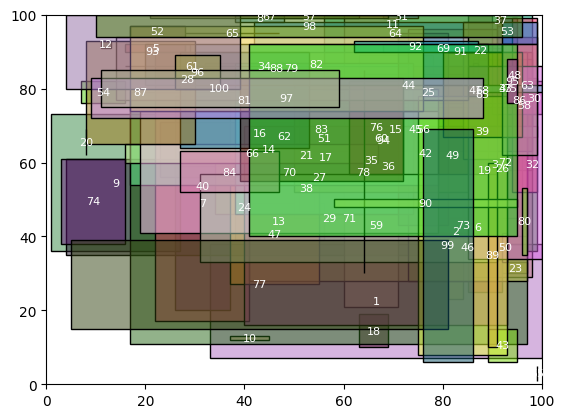

Enter x coordinate: 25
Enter y coordinate: 30
Naive
74.5 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
QuadTree
9.63 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
The point (25.0, 30.0) is enclosed in the rectangles: [29, 40, 77]
The point (25.0, 30.0) is enclosed in the rectangles: [40, 77, 29]


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from google.colab import files
import io

def plot_rect(ax, position, size, rectangle_id):
    edge_color = 'black'
    face_color = (random.random(), random.random(), random.random(), 0.5)
    rectangle = patches.Rectangle(position, size[0], size[1], edgecolor=edge_color, facecolor=face_color,)
    ax.add_patch(rectangle)

    # Display rectangle ID as a label inside the rectangle
    ax.text(position[0] + size[0] / 2, position[1] + size[1] / 2, str(rectangle_id),
            color='white', ha='center', va='center', fontsize=8)

def read_file_content(file_content):
    rectangles = []

    first_line = True
    for line in file_content:
        line = line.strip()

        if line:
            if first_line:
                numbers_str = line[2:-2].strip()
                first_line = False
            else:
                numbers_str = line[1:-2].strip()

            if numbers_str:
                individual_numbers = [num.strip() for num in numbers_str.split(',') if num.strip()]
                set_of_numbers = list(map(int, individual_numbers))
                rectangles.append(set_of_numbers)

    return rectangles

def is_point_inside_rect(point, rect_instance):
    x, y = point
    return (
        rect_instance.left_bottom_corner_x <= x <= rect_instance.right_top_corner_x and
        rect_instance.left_bottom_corner_y <= y <= rect_instance.right_top_corner_y
    )

def find_enclosing_rectangles(point, rectangles):
    enclosing_rectangles = []

    for index, set_of_numbers in enumerate(rectangles, start=1):
        rect_instance = RectDetails(*set_of_numbers)
        if is_point_inside_rect(point, rect_instance):
            enclosing_rectangles.append(index)

    return enclosing_rectangles

def find_enclosing_rectangles_quad(point, qtree):
    enclosing_rectangles = []
    x, y = point

    for rect_params in qtree.intersect((x, y, x, y)):
        enclosing_rectangles.append(rect_params.rectangle_id)

    return enclosing_rectangles

def main():
    # Upload your_file.txt
    uploaded = files.upload()

    # Get the name of the uploaded file
    file_name = list(uploaded.keys())[0]

    # Create a file-like object from the uploaded content
    file_content = uploaded[file_name].decode('utf-8')
    file_object = io.StringIO(file_content)

    # Read the file content and get a list of rectangle details
    rectangles = read_file_content(file_object)

    qtree = Index(bbox=(0, 0, 100, 100))
    for rect_params in rectangles:
        rect_instance = RectDetails(*rect_params)
        qtree.insert(item=rect_instance, bbox=(rect_instance.left_bottom_corner_x,
                                               rect_instance.left_bottom_corner_y,
                                               rect_instance.right_top_corner_x,
                                               rect_instance.right_top_corner_y))

    # Plot the rectangles
    fig, ax = plt.subplots()
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)

    for index, set_of_numbers in enumerate(rectangles, start=1):
        rect_instance = RectDetails(*set_of_numbers)
        block_left_bottom = (rect_instance.left_bottom_corner_x, rect_instance.left_bottom_corner_y)
        size = [rect_instance.right_top_corner_x - rect_instance.left_bottom_corner_x,
                rect_instance.right_top_corner_y - rect_instance.left_bottom_corner_y]

        plot_rect(ax, block_left_bottom, size, index)

    plt.show()

    x = float(input("Enter x coordinate: "))
    y = float(input("Enter y coordinate: "))
    point = (x, y)
    print("Naive")
    %timeit -r 1 -o find_enclosing_rectangles(point, rectangles)
    enclosing_rectangles_naive = find_enclosing_rectangles(point, rectangles)
    print("QuadTree")
    %timeit -r 1 -o find_enclosing_rectangles_quad(point, qtree)
    enclosing_rectangles_quadtree = find_enclosing_rectangles_quad(point, qtree)

    # Print the result for naive approach

    if enclosing_rectangles_naive:
        print(f"The point {point} is enclosed in the rectangles: {enclosing_rectangles_naive}")
    else:
        print(f"The point {point} is not enclosed in any rectangle.")

    # Print the result for quadtree approach

    if enclosing_rectangles_quadtree:
        print(f"The point {point} is enclosed in the rectangles: {enclosing_rectangles_quadtree}")
    else:
        print(f"The point {point} is not enclosed in any rectangle.")

# Run the main function
if __name__ == "__main__":
    main()
